In [67]:
# Importação de bibliotecas

import pytesseract as ts
import numpy as np
import cv2 
from matplotlib import pyplot as plt
from PIL import ImageFont, ImageDraw, Image
from pytesseract import Output

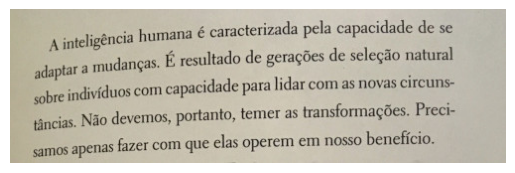

In [2]:
# Carregando a imagem

img = cv2.imread('trecho-livro.jpg')

# Converção para RGB

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Exibição da imagem

plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [11]:
# Converção em texto

config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = ts.image_to_string(img_rgb, lang='por', config=config_tesseract)
print(texto)


A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
Sobre indivíduos com capacidade para lidar com as novas ciruns-
tâncias. Não devemos, portanto, temer as transformações. Preci-
samos apenas fazer com que elas operem em nosso benefício.



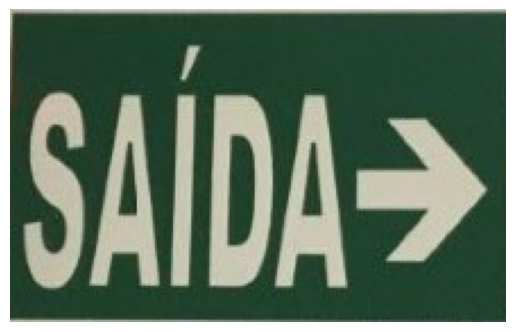

In [21]:
# Carregando a imagem

img2 = cv2.imread('saida.jpg')

# Converção para RGB

img_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Exibição da imagem

plt.imshow(img_rgb2)
plt.axis('off')
plt.show()

In [22]:
# Converção em texto

config_tesseract = '--tessdata-dir tessdata --psm 7'
texto = ts.image_to_string(img_rgb2, lang='por', config=config_tesseract)
print(texto)

SAÍDA>



## Reconhecimento de textos

In [70]:
# Leitura da imagem
img3 = cv2.imread('teste02.jpg')

# Converção para RGB
rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

In [72]:
# Conversão de imagem para data com Output

config_tesseract = '--tessdata-dir tessdata'
resultado = ts.image_to_data(img3, config=config_tesseract, lang='por', output_type=Output.DICT)
resultado

{'level': [1, 2, 3, 4, 5, 4, 5, 5, 5, 4, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3],
 'word_num': [0, 0, 0, 0, 1, 0, 1, 2, 3, 0, 1],
 'left': [0, 111, 111, 182, 182, 111, 111, 380, 437, 130, 130],
 'top': [0, 84, 84, 84, 84, 165, 167, 179, 165, 247, 247],
 'width': [700, 481, 481, 341, 341, 481, 237, 30, 155, 440, 440],
 'height': [400, 222, 222, 62, 62, 50, 48, 36, 50, 59, 59],
 'conf': [-1, -1, -1, -1, 90, -1, 88, 93, 91, -1, 91],
 'text': ['',
  '',
  '',
  '',
  'inteligência',
  '',
  'artificial',
  'e',
  'visão',
  '',
  'computacional']}

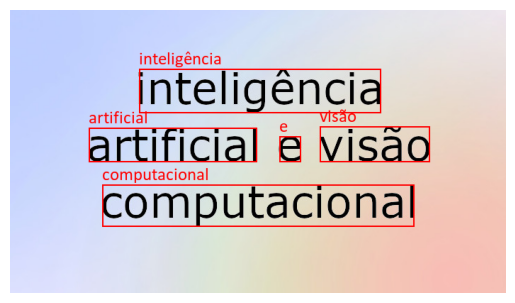

In [76]:
# Configurações do Tesseract e da fonte
config_tesseract = '--tessdata-dir tessdata --psm 6'
font_path = 'C:\\Users\\lucas\\Desktop\\PC\\Projetos\\Jupyter\\OCR\\PSM\\Fontes\\calibri.ttf'
font_size = 25
font = ImageFont.truetype(font_path, font_size)

# Carregar a imagem, convertê-la e obter dados de OCR
img_rgb = cv2.cvtColor(cv2.imread('teste02.jpg'), cv2.COLOR_BGR2RGB)
data = ts.image_to_data(img_rgb, lang='por', config=config_tesseract, output_type=ts.Output.DICT)

# Criar uma imagem PIL a partir da imagem OpenCV
img_pil = Image.fromarray(img_rgb)
draw = ImageDraw.Draw(img_pil)

# Desenhar caixas e textos para cada letra
for i in range(len(data['text'])):
    if int(data['conf'][i]) > 0 and data['text'][i].strip(): 
        x, y, w, h = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
        draw.rectangle([x, y, x + w, y + h], outline=(255, 0, 0), width=2) 
        draw.text((x, y - font_size), data['text'][i], fill=(255, 0, 0), font=font)

# Exibir a imagem resultante
plt.imshow(img_pil)
plt.axis('off')
plt.show()